# Example of dSPN optimisation - Dopaminergic modulation

### Neuromodcell

To optimise for neuromodulation, the software requires morphology.swc, parameter.json and mechanisms.json, like in the "model"-directory 

In [1]:
ls ../model/dspn/

mechanisms.json  morphology.swc  parameters.json  parameters.json~  README.md


### Structure of parameters.json and mechanisms.json

Check the structure of the "parameters.json". It is a list of parameter sets if several parameter_id for each morphology!


Neuromodcell requires python>=3.6 and other requirements. To install neuromodcell, install git, git clone the repository:

```
git clone https://github.com/jofrony/Neuromodcell

```
move to the root dir of the git repo and simply write:

```
pip install neuromodcell -r requirements.txt

```


TIP! is to install jupyter notebook (if you are viewing this on your device, you obviously have it already). It is a conformtable way to work with computational tasks. Although you can write a python script to include the code below as well and run it in your terminal.








To set up the optimisation, first import the defineModulation from neuromodcell.modulation_set. Here you will define, the path to your model, the parameterID of your model (the parameters.json should be a list of models), define cell name. 

Before this step you should have added the level, mod, and maxMod parameters to your mod-files (for example view mechanisms-dspn-folder for cal13.mod). In this example the dopamine modulation was given the name 'modulationDA', hence the parameters added to the ion channel models are maxModDA, levelDA and modDA. The acetylcholine modulation was named modulationB and hence the name is maxModACh, levelACh and modB. 

If this step is not complete, the following steps will not work

In [2]:
from neuromodcell.modulation_set import DefineModulation

compile the mod-files which you would like to use in the optimisation (i.e. which contains the modA, levelA etc modifications)

In [3]:
!nrnivmodl mechanisms-dspn/

/home/jofrony/Dropbox/Repositories/Neuromodcell/examples/dSPN
ls: cannot access 'mechanisms-dspn//*.inc': No such file or directory
mechanisms-dspn//bk_ms.mod mechanisms-dspn//cadyn_ms.mod mechanisms-dspn//cal12_ms.mod mechanisms-dspn//cal13_ms.mod mechanisms-dspn//caldyn_ms.mod mechanisms-dspn//can_ms.mod mechanisms-dspn//caq_ms.mod mechanisms-dspn//car_ms.mod mechanisms-dspn//cat32_ms.mod mechanisms-dspn//cat33_ms.mod mechanisms-dspn//Im_ms.mod mechanisms-dspn//kaf_ms.mod mechanisms-dspn//kas_ms.mod mechanisms-dspn//kdr_ms.mod mechanisms-dspn//kir_ms.mod mechanisms-dspn//naf_ms.mod mechanisms-dspn//sk_ms.mod
bk_ms.mod cadyn_ms.mod cal12_ms.mod cal13_ms.mod caldyn_ms.mod can_ms.mod caq_ms.mod car_ms.mod cat32_ms.mod cat33_ms.mod Im_ms.mod kaf_ms.mod kas_ms.mod kdr_ms.mod kir_ms.mod naf_ms.mod sk_ms.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod

### Neuromodulation set up

In the parameters.json used in the example, there are 4 models. Hence, we set up and optimisation for each parameterID (i.e model). 

We use the class definModulation, to set the parameterID, cell name, the key for the modulation (i.e modulationA) and which modulation this corresponds to (i.e dopamine). We set up the output dir, by calling class_instance.new_modulation_dir. 
Then the simulation time as tstop and the time step used in the simulation. As the modulation is set as a vector, we need to predefine the length of this vector, which is done by knowing the duration and the time step. Finally, we set the population (how many parameter variations for the neuromodulation, we should run).


### Which ion channels should be modulated?

To select the ion channels to be modulated can either be based on hypothesis or from extensive literature reviews. Usually, the common neuromodulators have been investigated in many different cell types and individual currents or channels have been implicated in modulation. We collected information based on a previous publication (Lindroos et al 2018, Lindroos et al 2020) and extracted the reported ranges of modulation (i.e 0.5 would indicate 50% reduction in a parameter). In some publications, there might be information on specific regions of neurons being modulated by a specific neuromodulator, like in the example below N-type calcium channel modulation is limited to the soma. This also depends on the detail of your model. One cannot modulate an ion channel which is not present in the model (so review your model given the information you received from your literature review). 

### Which experiment should be replicated?

To optimise for the behaviour following neurmodulation, the optimal experiment would contain the bath application the neuromodulation coupled to current clamp or voltage clamp recordings of the neuron before and after application. In the example, we have chosen an experiment from Planert et al. 2013 where striatal projection neurons were recorded in current clamp and the number of action potentials were measure before and after application of dopamine. 

Hence, we defined the experiment with current clamp and set the selection criteria to be the observed change in the number of action potentials (and a standard deviation).

Additional ways of measuring the electrophysiological behaviour can be added to the code for custom use (see neuromodcell/selection_functions.py and neuromodcell/selection_criteria.py to see the structure of the code).





#### Example for parameterID 0

In [6]:
cellTypefolder = '../model/dspn/'
output_dir = 'dspn/'
parameterID = 0
modset = DefineModulation(parameterID = parameterID,\
                          cell_name='dSPN',\
                          output_dir=output_dir,\
                          cell_dir=cellTypefolder,
                          tstop=1000,\
                          time_step=0.025,\
                          population=4)

modset.define_neuromodulation(modulationDA = "dopamine")


modset.define_modulation_parameter('naf_ms','dopamine','somatic', [0.6,0.8])
modset.define_modulation_parameter('naf_ms','dopamine','basal', [0.6,0.8])

modset.define_modulation_parameter('kas_ms','dopamine','somatic', [0.65,0.85])
modset.define_modulation_parameter('kas_ms','dopamine','basal', [0.65,0.85])

modset.define_modulation_parameter('kaf_ms','dopamine','somatic', [0.75,0.85])
modset.define_modulation_parameter('kaf_ms','dopamine','basal', [0.75,0.85])

modset.define_modulation_parameter('kir_ms','dopamine','somatic', [0.85,1.25])
modset.define_modulation_parameter('kir_ms','dopamine','basal', [0.85,1.25])

modset.define_modulation_parameter('cal12_ms','dopamine','somatic', [1,2])
modset.define_modulation_parameter('cal12_ms','dopamine','basal', [1,2])

modset.define_modulation_parameter('cal13_ms','dopamine','somatic', [1,2])
modset.define_modulation_parameter('cal13_ms','dopamine','basal', [1,2])

modset.define_modulation_parameter('can_ms','dopamine','somatic', [0.2,1])

modset.define_modulation_function(modulation_function = "bath_application",gmax = 1)
modset.define_protocol(typeEx = 'current_clamp', start = 0,duration = 1000 , amp = 0.12)

modset.define_protocol(typeEx = 'current_clamp', start = 200, duration = 500 , amp = 0.5)
modset.define_selection_criteria(function = "number_AP_increase", mean = 6.44, std = 2.8, \
                                 threshold = 1.5, tstart = 200,tstop= 700)

modset.save_modulation_setup()

In [7]:
parameterIDmodel = 'dspn/dopamine/ID_' + str(parameterID)
seed = 123456

!mpiexec -n 4 python optimise_dspn.py $parameterIDmodel $seed

numprocs=4
Seconds = 67.47948622703552
/usr/local/nrn/lib/python/neuron/__init__.py:430: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(nt_dlls) is 0:
/usr/local/nrn/lib/python/neuron/__init__.py:432: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if h.nrnversion(8).find('i686') is 0:
/home/jofrony/miniconda3/envs/py38/lib/python3.8/site-packages/bluepyopt/ephys/simulators.py:86: UserWarning: Unable to find Neuron hoc shared library in /usr/local/nrn/lib/python/neuron, not disabling banner
  warnings.warn('Unable to find Neuron hoc shared library in %s, '
Models passed   3
Seconds = 67.78620553016663
Seconds = 67.72451281547546
/usr/local/nrn/lib/python/neuron/__init__.py:430: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(nt_dlls) is 0:
/usr/local/nrn/lib/python/neuron/__init__.py:432: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if h.nrnversion(8).find('i686') is 0:
/home/jofrony/miniconda3/envs/py38/lib/python3.8/site-packages/

# Literature

Planert et al 2013, Figure 6 C mean increase AP : 6.44 , std 0.89

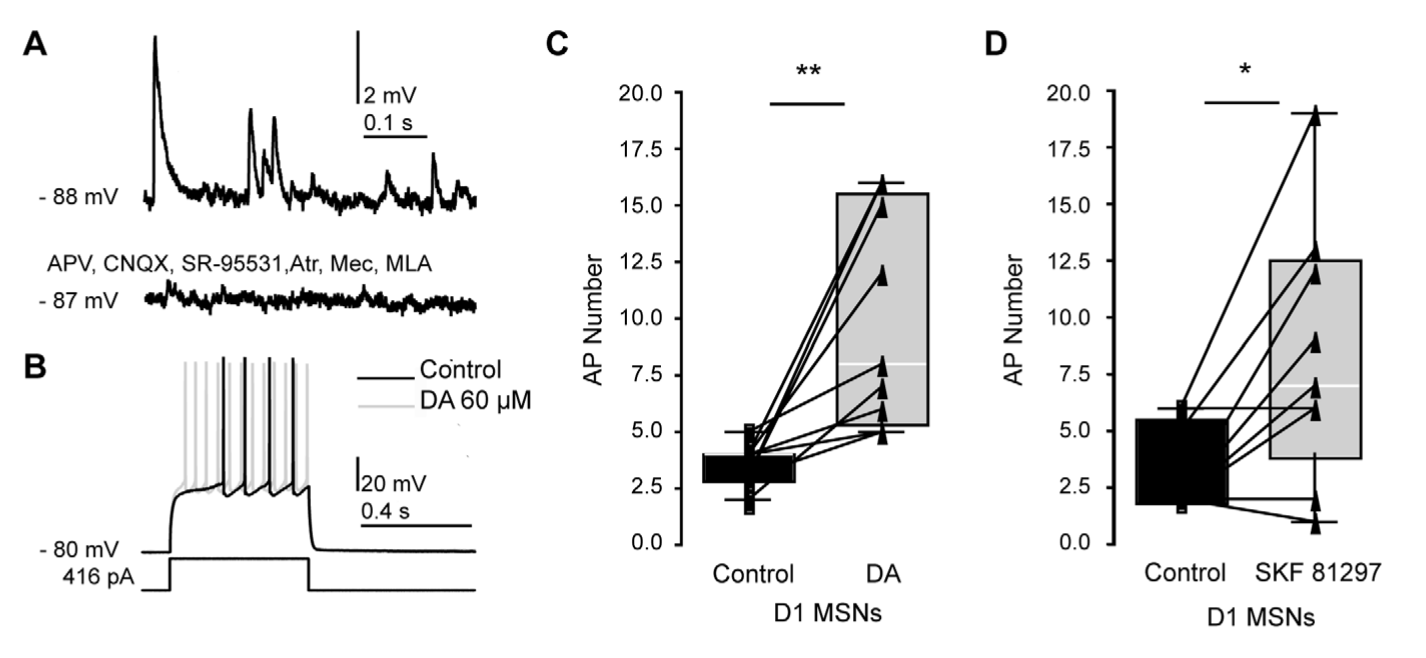